## Code Authored by Avik Chakraborty
### This project follows on the creation of a predictive model that will detect the type of news whether it is fake or real.

### Objectives :
##### 1. Load the dataset.
##### 2. Data Cleaning.
##### 3. Text Preprocessing.
##### 4. Feature Extraction.
##### 5. Model Building
##### 6. Model Training.
##### 7. Evaluation of Model.
##### 8. Make Confusion Matrix.
##### 9. Make Classification Report.
##### 10. Error Analysis.
##### 11. Saving the model.

#### Importing the necessary libraries

In [1]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as mplot
import seaborn
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

#### Loading the dataset

In [2]:
dataset = pandas.read_csv('news.csv')
dataset.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
dataset.shape

(6335, 4)

### Data Cleaning
##### Checking the label column
Checking the label column if it contains any other values than FAKE and REAL .

In [4]:
dataset['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

##### No other values is present other than the required one.
##### Checking for missing values

In [5]:
dataset.isna().any()

Unnamed: 0    False
title         False
text          False
label         False
dtype: bool

### Text Preprocessing

##### Downloading the 'stopwords' and 'punkt' package.

In [6]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Avik
[nltk_data]     Chakraborty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Avik
[nltk_data]     Chakraborty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##### Pre-processing the text for better usability for the model.

In [7]:
def preprocessing_Text(text):
    # Removing the punctuations and numbers
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Converting the words to lower case
    text = text.lower()

    # Tokenizing the words
    words = word_tokenize(text)

    # Removing the stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [8]:
dataset['text'] = dataset['text'].apply(preprocessing_Text)

print('Text Preprocessing done !')

Text Preprocessing done !


### Feature Extraction

In [9]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(dataset['text']).toarray()
Y = dataset['label']

In [27]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08582919, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.0287764 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [28]:
Y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

### Model Building
##### Splitting the data into training and testing set.

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)

### Model Building
##### Building the model and training the model.

In [30]:
model = GaussianNB()
model.fit(xTrain, yTrain)

GaussianNB()

##### Predicting

In [32]:
yPred = model.predict(xTest)
yPred

array(['FAKE', 'FAKE', 'FAKE', ..., 'REAL', 'REAL', 'REAL'], dtype='<U4')

In [34]:
accuracy = accuracy_score(yTest, yPred)
confusionMatrix = confusion_matrix(yTest, yPred)
classificationReport = classification_report(yTest, yPred)

##### Printing the Evaluations

In [37]:
print(f'Accuracy = {accuracy}')

Accuracy = 0.8602999210734017


In [38]:
print(f'Confusion Matrix = \n{confusionMatrix}')

Confusion Matrix = 
[[535  93]
 [ 84 555]]


In [40]:
print(f'Classification Report = \n{classificationReport}')

Classification Report = 
              precision    recall  f1-score   support

        FAKE       0.86      0.85      0.86       628
        REAL       0.86      0.87      0.86       639

    accuracy                           0.86      1267
   macro avg       0.86      0.86      0.86      1267
weighted avg       0.86      0.86      0.86      1267



##### Plotting the Confusion Matrix.

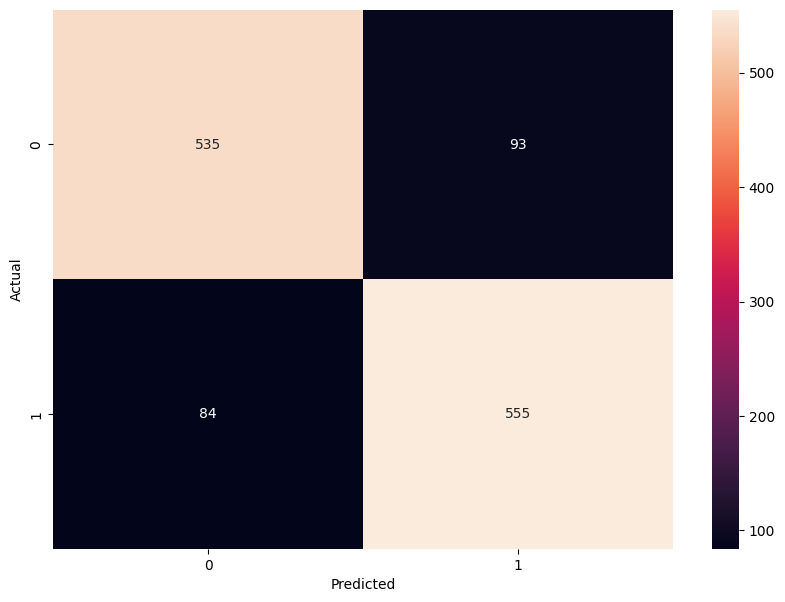

In [43]:
mplot.figure(figsize=(10,7))
seaborn.heatmap(confusionMatrix, annot=True, fmt='d')
mplot.xlabel('Predicted')
mplot.ylabel('Actual')
mplot.show()

##### Error Analysis

In [46]:
errorDF = {}
errorDF.update({'Y_Predicted' : yPred, 'Y_Actual' : yTest})
errorDF = pandas.DataFrame(errorDF)
errorDF

,Y_Predicted,Y_Actual
1357,FAKE,FAKE
2080,FAKE,FAKE
2718,FAKE,FAKE
812,FAKE,FAKE
4886,FAKE,FAKE
...,...,...
1512,FAKE,FAKE
57,REAL,REAL
6092,REAL,REAL
3403,REAL,REAL


##### Plotting the Error Analysis

In [50]:
# Converting yTest and yPred to pandas DataFrames
results_df = pandas.DataFrame({
    'True Labels': yTest,
    'Predicted Labels': yPred
})

# Counting occurrences of each class
true_counts = results_df['True Labels'].value_counts().sort_index()
pred_counts = results_df['Predicted Labels'].value_counts().sort_index()

# Creating a DataFrame for plotting
plot_df = pandas.DataFrame({
    'Class': true_counts.index,
    'True Labels': true_counts.values,
    'Predicted Labels': pred_counts.reindex(true_counts.index, fill_value=0).values
})

C:\Users\Avik Chakraborty\AppData\Local\Temp\ipykernel_28628\3964132096.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.barplot(x='Class', y='True Labels', data=plot_df, color='blue', alpha=0.6, label='True Labels', ci=None)
C:\Users\Avik Chakraborty\AppData\Local\Temp\ipykernel_28628\3964132096.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.barplot(x='Class', y='Predicted Labels', data=plot_df, color='red', alpha=0.6, label='Predicted Labels', ci=None)


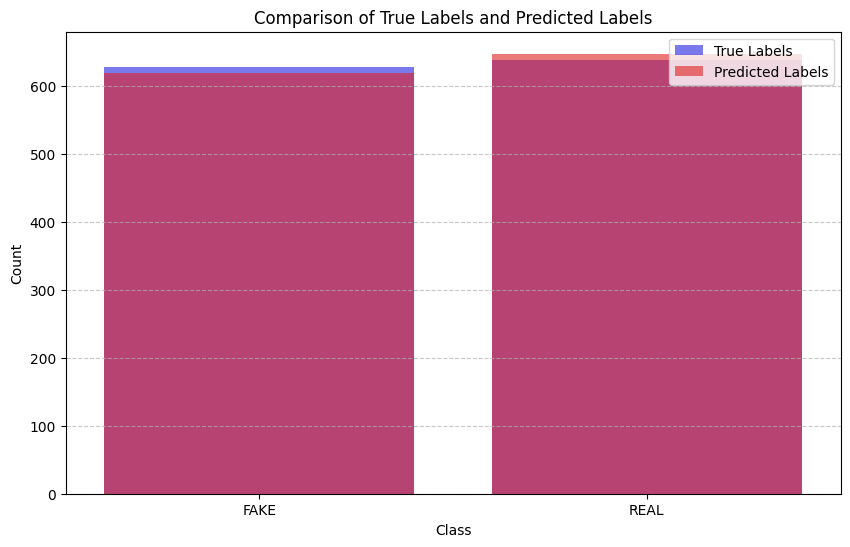

In [51]:
# Setting up the plot
mplot.figure(figsize=(10, 6))

# Plotting true labels
seaborn.barplot(x='Class', y='True Labels', data=plot_df, color='blue', alpha=0.6, label='True Labels', ci=None)

# Plotting predicted labels
seaborn.barplot(x='Class', y='Predicted Labels', data=plot_df, color='red', alpha=0.6, label='Predicted Labels', ci=None)

# Add labels and title
mplot.xlabel('Class')
mplot.ylabel('Count')
mplot.title('Comparison of True Labels and Predicted Labels')
mplot.legend()
mplot.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
mplot.show()

### Saving the model
##### The model will be saved in the saved models folder with the extension .pkl.

In [54]:
filename = 'saved models/gaussian_nb_model.pkl'
joblib.dump(model, filename)

print(f"Model saved to {filename}")

Model saved to saved models/gaussian_nb_model.pkl


### ConClusion
##### 1. Every point has been covered from the task list
##### 2. The model has provided with correct result with an accuracy of 0.8602999210734017
##### 3. Model have been saved.